In [122]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [123]:
df=pd.read_csv("/Users/sophiegeoghan/Desktop/Machine_Learning_Lab/data/orders.csv")

In [124]:
print(df.shape)
df.sample(10)
df=df.drop(['Postal.Code','Order.Priority','Row.ID','Ship.Date','Ship.Mode'],axis=1)

(51290, 24)


In [125]:
# convert Profit and Sales to Floats
df.Profit=df.Profit.str.replace('$', '')
df.Profit=df.Profit.str.replace(',', '')
df.Profit=df.Profit.apply(lambda x: float(x))

df.Sales=df.Sales.str.replace('$', '')
df.Sales=df.Sales.str.replace(',', '')
df.Sales=df.Sales.apply(lambda x: float(x))

In [126]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping.Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490685,3.476545,0.142908,28.610970,26.478567
std,487.565388,2.278766,0.212280,174.341066,57.251373
min,0.440000,1.000000,0.000000,-6599.980000,1.002000
25%,30.762500,2.000000,0.000000,0.000000,2.610000
50%,85.055000,3.000000,0.000000,9.240000,7.790000
75%,251.055000,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.980000,933.570000


In [127]:
df.describe(include=['O'])

,Order.ID,Order.Date,Customer.ID,Customer.Name,Segment,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,1430,17415,796,3,3650,1102,165,23,5,3788,3,17,3788
top,CA-2015-SV20365140-42268,6/18/15,SV-203651406,Muhammed Yedwab,Consumer,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples
freq,14,135,26,108,26518,915,2001,9994,5883,14302,227,31289,6146,227


In [128]:
df.isnull().sum() # postal code is the only column with missing values - 80%
# df["Postal.Code"].value_counts()
df.isnull().sum()/df.shape[0]*100

Order.ID         0.0
Order.Date       0.0
Customer.ID      0.0
Customer.Name    0.0
Segment          0.0
City             0.0
State            0.0
Country          0.0
Region           0.0
Market           0.0
Product.ID       0.0
Category         0.0
Sub.Category     0.0
Product.Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
Shipping.Cost    0.0
dtype: float64

In [129]:
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
# sns.set(style='ticks', context='talk')

# sns.swarmplot('Shipping.Cost','Profit', hue='Country',data=df,size=8,dodge=True)
# sns.despine()

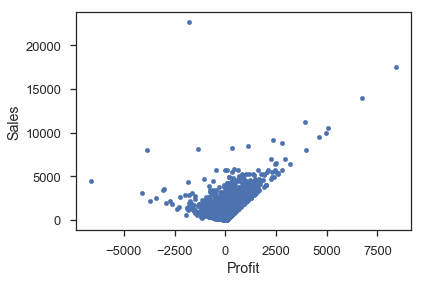

In [130]:
df.plot.scatter(x='Profit', y='Sales')

## Problem 2

In [131]:
from datetime import date, datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

print(get_season(date.today()))

summer


In [132]:
df['Order.Date']=list(map(lambda x:pd.to_datetime(x),df['Order.Date']))

In [133]:
seasonal=df[['Order.Date','Product.ID','Quantity','Category']]
seasonal.columns=['OrderDate','ProductID','Quantity','Category']

In [134]:
seasonal['season']=seasonal.OrderDate.apply(lambda x: get_season(x))

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
# seasonal_df=df[['Order.Date','Product.ID','Quantity']]
# df.groupby('Customer.ID')
# df.loc[df['Customer.ID']=='AA-10315102']

In [136]:
seasonal.groupby(['season','Category']).sum()#agg(sum('Quantity'))

Quantity
season Category                 
autumn Furniture           11907
       Office Supplies     35364
       Technology          11592
spring Furniture            7490
       Office Supplies     24222
       Technology           7683
summer Furniture            9412
       Office Supplies     30268
       Technology           9716
winter Furniture            6083
       Office Supplies     18390
       Technology           6185

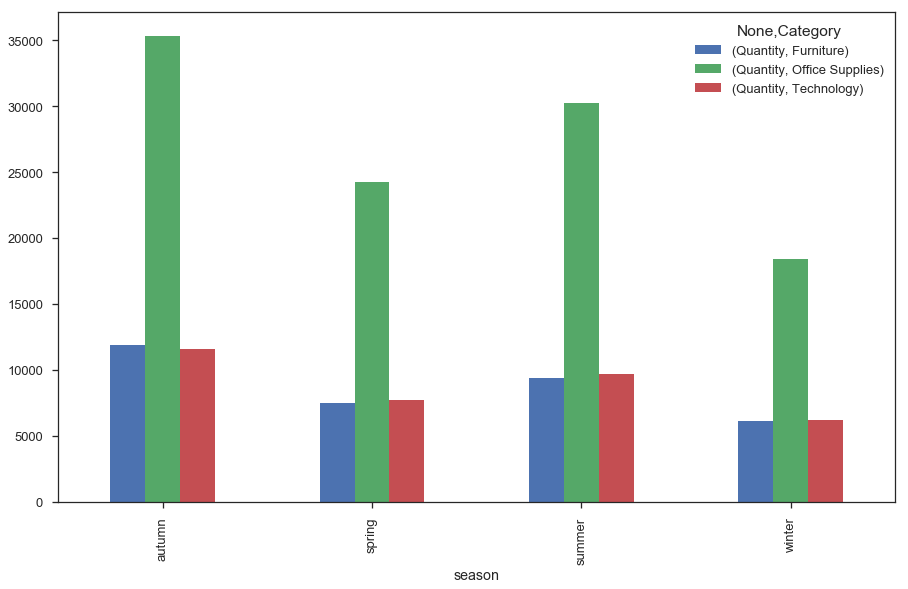

In [137]:
seasonal.groupby(['season','Category']).sum().unstack().fillna(0).plot(kind='bar',figsize=(15,9))

## Problem 3 Returned Orders

In [138]:
returns=pd.read_csv("/Users/sophiegeoghan/Desktop/Machine_Learning_Lab/data/returns.csv")

In [139]:
returns.sample(10)

,Returned,Order ID,Region
906,Yes,MX-2012-BS1159039-41175,Central America
621,Yes,ID-2013-TM210107-41492,Oceania
770,Yes,ES-2015-LD1685548-42185,Western Europe
566,Yes,GG-2012-BS159047-41184,Western Asia
346,Yes,IN-2014-DB1291027-41870,Eastern Asia
559,Yes,NG-2013-NB858094-41469,Western Africa
1077,Yes,CA-2015-EB13870140-42269,Eastern US
478,Yes,MX-2013-AF1087026-41536,South America
20,Yes,IN-2013-JC157757-41310,Oceania
102,Yes,ES-2014-RM1937545-41643,Western Europe


In [140]:
df2=pd.merge(df,returns,right_on='Order ID',left_on='Order.ID')

In [146]:
df2.sample(10)
# df2.Returned.unique()

,Order.ID,Order.Date,Customer.ID,Customer.Name,Segment,City,State,Country,Region_x,Market,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Returned,Order ID,Region_y,Year
200,ID-2015-TB214007-42322,2015-11-14,TB-214007,Tom Boeckenhauer,Consumer,Toowoomba,Queensland,Australia,Oceania,Asia Pacific,...,"Hon Computer Table, Fully Assembled",689.14,2,0.30,-226.46,122.10,Yes,ID-2015-TB214007-42322,Oceania,2015
714,ES-2014-JB1600048-41856,2014-08-05,JB-1600048,Joy Bell-,Consumer,Bielefeld,North Rhine-Westphalia,Germany,Western Europe,Europe,...,"Hoover Blender, Black",171.56,2,0.10,47.60,35.50,Yes,ES-2014-JB1600048-41856,Western Europe,2014
1891,IN-2015-AA1031558-42361,2015-12-23,AA-1031558,Alex Avila,Consumer,Chennai,Tamil Nadu,India,Southern Asia,Asia Pacific,...,"Cardinal Binder, Durable",45.99,3,0.00,13.32,2.57,Yes,IN-2015-AA1031558-42361,Southern Asia,2015
2174,CA-2012-TT21070140-41159,2012-09-07,TT-210701408,Ted Trevino,Consumer,Chesapeake,Virginia,United States,Southern US,USCA,...,Advantus Plastic Paper Clips,45.00,9,0.00,21.60,5.37,Yes,CA-2012-TT21070140-41159,Southern US,2012
132,ID-2014-CS11860102-41858,2014-08-07,CS-11860102,Cari Schnelling,Consumer,Manila,National Capital,Philippines,Southeastern Asia,Asia Pacific,...,"Cisco Smart Phone, Cordless",1954.44,4,0.25,-286.68,175.45,Yes,ID-2014-CS11860102-41858,Southeastern Asia,2014
1011,IN-2014-TB2162558-41724,2014-03-26,TB-2162558,Trudy Brown,Consumer,Tirupati,Andhra Pradesh,India,Southern Asia,Asia Pacific,...,"Deflect-O Photo Frame, Duo Pack",311.76,6,0.00,105.84,20.14,Yes,IN-2014-TB2162558-41724,Southern Asia,2014
1534,ET-2014-SV1081543-41814,2014-06-24,SV-1081543,Stuart Van,Corporate,Dire Dawa,Dire Dawa,Ethiopia,Eastern Africa,Africa,...,"Rogers File Cart, Single Width",142.08,1,0.00,22.71,7.45,Yes,ET-2014-SV1081543-41814,Eastern Africa,2014
617,IT-2013-KH1669045-41490,2013-08-04,KH-1669045,Kristen Hastings,Corporate,Aulnay-sous-Bois,Ile-de-France,France,Western Europe,Europe,...,"Hon File Folder Labels, Laser Printer Compatible",17.28,2,0.00,2.04,1.89,Yes,IT-2013-KH1669045-41490,Western Europe,2013
788,ES-2015-AB1016545-42356,2015-12-18,AB-1016545,Alan Barnes,Consumer,Montreuil,Ile-de-France,France,Western Europe,Europe,...,"Ames Mailers, with clear poly window",118.17,3,0.00,57.87,29.88,Yes,ES-2015-AB1016545-42356,Western Europe,2015
1895,IN-2015-DL1292558-42167,2015-06-12,DL-1292558,Daniel Lacy,Consumer,Kota,Rajasthan,India,Southern Asia,Asia Pacific,...,"Cardinal Binder, Durable",45.99,3,0.00,13.32,2.56,Yes,IN-2015-DL1292558-42167,Southern Asia,2015


In [143]:
df2['Year']=pd.DatetimeIndex(df2['Order.Date']).year

In [144]:
df2.groupby('Year').Profit.sum()

Year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

In [157]:
# How many customers returned more than once
print(sum((df2.groupby('Customer.ID').Quantity.sum())>1))
print(sum((df2.groupby('Customer.ID').Quantity.sum())>1)/df['Customer.ID'].unique().shape[0])

983
0.056445592879701405


In [159]:
# How many customers returned more than 5 times
print(sum((df2.groupby('Customer.ID').Quantity.sum())>5))
print(sum((df2.groupby('Customer.ID').Quantity.sum())>5)/df['Customer.ID'].unique().shape[0])

521
0.029916738443870227


In [163]:
df2.groupby('Region_x').count()

,Order.ID,Order.Date,Customer.ID,Customer.Name,Segment,City,State,Country,Market,Product.ID,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Returned,Order ID,Region_y,Year
Region_x,,,,,,,,,,,,,,,,,,,,,
Canada,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
Caribbean,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
Central Africa,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
Central America,248,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248
Central Asia,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Central US,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
Eastern Africa,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Eastern Asia,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
Eastern Europe,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
